## Тестовое задание Data Science 
- №1
### Прогнозирование направления движения цены

**Выполнила:** Анфиса Ганнова  
**Дата:** 7.06.2025г.

---

### Описание задачи

В рамках данного тестового задания необходимо создать модель машинного обучения для определения направления движения цены на следующий день.

#### Постановка задачи:
- **Цель:** Разработать модель МО для прогнозирования направления цены
- **Тип задачи:** Бинарная классификация (направление движения цены)



In [1]:
# локальный файл (https://github.com/anfisso666/test/blob/3b5b7a592298a6e46380b2beb1588b41f4e619f5/analyzer.py)
from analyzer import *

In [2]:
# Настройки отображения визуализаций
warnings.filterwarnings('ignore')
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_palette("husl")

### 1. Загрузка данных

In [3]:
df = load_data('test_ds_1.csv')  

In [4]:
df.sample(3)

,date,open,high,low,close,vol,target
77,2014-10-01,2010.0,2028.3,1990.0,1993.5,1070123,0
1762,2021-06-11,6570.0,6607.5,6488.0,6518.5,578710,0
2299,2023-08-22,6265.5,6677.0,6216.5,6606.5,5303696,0


### Описание данных:

Датасет содержит следующие признаки:
- **date** - дата наблюдения
- **open** - цена открытия
- **high** - максимальная цена за день
- **low** - минимальная цена за день  
- **close** - цена закрытия
- **vol** - объем торгов
- **target** - целевая переменная (направление движения цены на следующий день)

### План работы:

1. **Исследовательский анализ данных (EDA)**
   - Загрузка и первичный осмотр данных
   - Анализ распределений и выбросов
   - Временные зависимости и тренды
   - Корреляционный анализ

2. **Подготовка данных**
   - Обработка пропущенных значений
   - Создание дополнительных признаков
   - Масштабирование данных
   - Разделение на train/test

3. **Моделирование**
   - Выбор и обоснование метрик качества
   - Создание baseline модели
   - Подбор и обучение различных алгоритмов
   - Валидация и отбор лучшей модели

4. **Оценка результатов**
   - Анализ метрик на train и test выборках
   - Построение матрицы ошибок

### Выбор метрики:

Для оценки качества модели буду использовать:
- **Accuracy** - общая точность классификации
- **Precision и Recall** - для анализа качества по классам
- **F1-score** - сбалансированная метрика
- **ROC-AUC** - для оценки разделяющей способности модели

Основной фокус на **F1-score** как наиболее подходящую метрику для финансовых данных, где важны как точность, так и полнота предсказаний.


### 2. Первичный анализ

In [5]:
explore_data(df)

Размер данных: (2507, 7) 

Типы данных по колонкам:
date: ['Timestamp']
open: ['float']
high: ['float']
low: ['float']
close: ['float']
vol: ['int']
target: ['int']

Статистика:
                                 date         open         high          low  \
count                           2507  2507.000000  2507.000000  2507.000000   
mean   2019-06-09 15:13:16.968488192  4460.243638  4511.057519  4405.094655   
min              2014-06-16 00:00:00  1916.000000  1949.000000  1911.500000   
25%              2016-12-08 12:00:00  2939.050000  2964.750000  2901.750000   
50%              2019-06-04 00:00:00  4452.000000  4512.500000  4381.500000   
75%              2021-11-24 12:00:00  5621.500000  5692.500000  5566.500000   
max              2024-06-14 00:00:00  8152.500000  8175.000000  8080.000000   
std                              NaN  1601.778261  1614.741585  1585.718511   

             close           vol       target  
count  2507.000000  2.507000e+03  2507.000000  
mean   4461.6

### 3. Проверка качества данных

In [6]:
issues = check_data_quality(df)
if issues:
    print("\nОбнаруженные проблемы:")
    for issue in issues:
        print(f"- {issue}")

1. Проверка отрицательных значений:
   open: ✓ Нет отрицательных значений
   high: ✓ Нет отрицательных значений
   low: ✓ Нет отрицательных значений
   close: ✓ Нет отрицательных значений
   vol: ✓ Нет отрицательных значений

2. Проверка нулевых значений:
   target: 1221 нулевых значений

3. Проверка дубликатов:
   Дубликаты по дате: 0

4. Проверка порядка дат:
   ✓ Данные отсортированы по дате

5. Распределение целевой переменной:
Значение 1: 51.30%
Значение 0: 48.70%


### 4. Визуализация

<Figure size 1500x500 with 0 Axes>

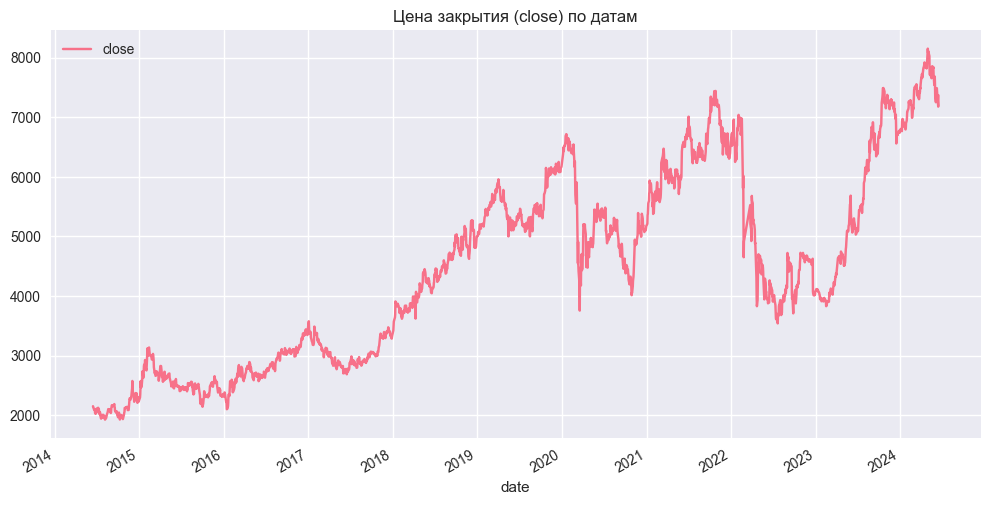

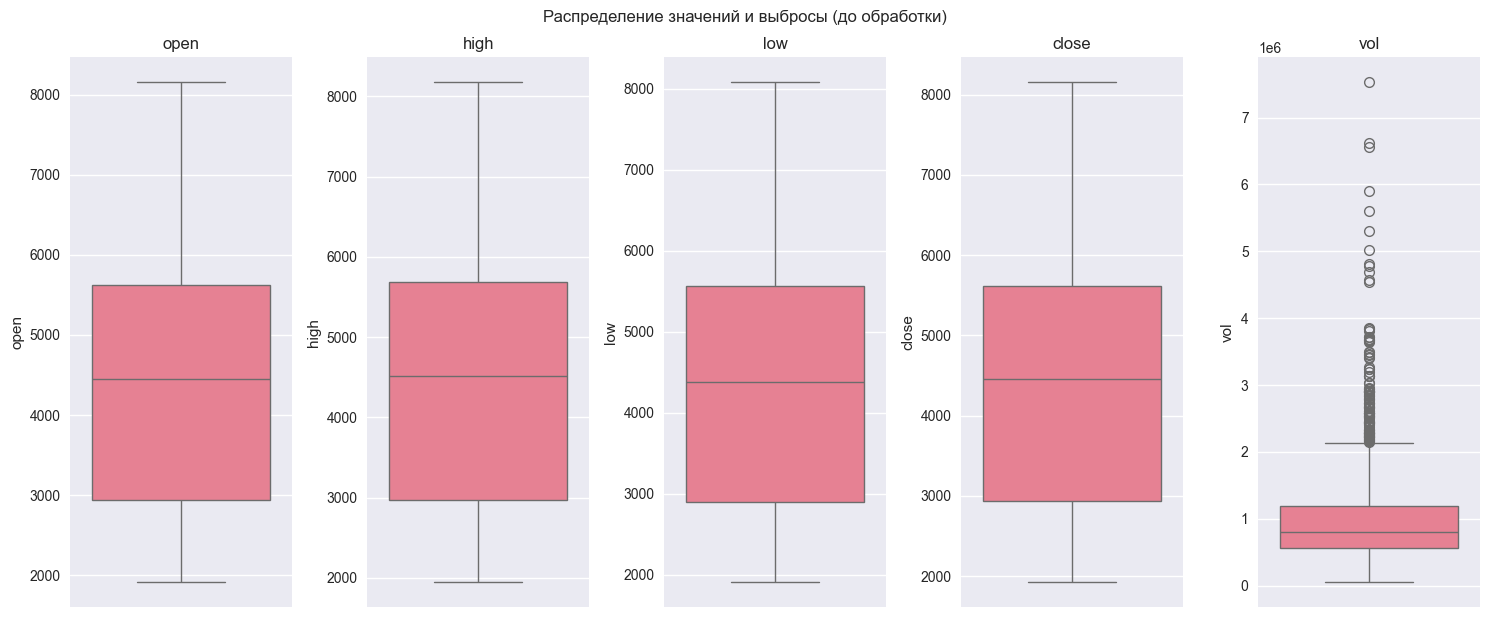

In [7]:
visualize_data(df)

### 5. Анализ выбросов

In [8]:
outlier_results = detect_outliers(df, method='iqr')
df = handle_outliers(df, column='vol', method='iqr')

Анализ выбросов (IQR метод):
open: 0 выбросов (границы: -1084.62, 9645.17), IQR: 2682.45
high: 0 выбросов (границы: -1126.88, 9784.12), IQR: 2727.75
low: 0 выбросов (границы: -1095.38, 9563.62), IQR: 2664.75
close: 0 выбросов (границы: -1086.88, 9642.12), IQR: 2682.25
vol: 123 выбросов (границы: -395562.50, 2153317.50), IQR: 637220.00

Обработка выбросов для vol (iqr метод):
Всего наблюдений: 2507
Выбросов обнаружено: 123 (4.9%)
Нижняя граница: -395562.50
Верхняя граница: 2153317.50
Применено логарифмическое преобразование: np.log1p(vol)


### 6. Создание признаков

In [9]:
df = feature_engineering(df)

### 7. Анализ корреляции
- выбор значений

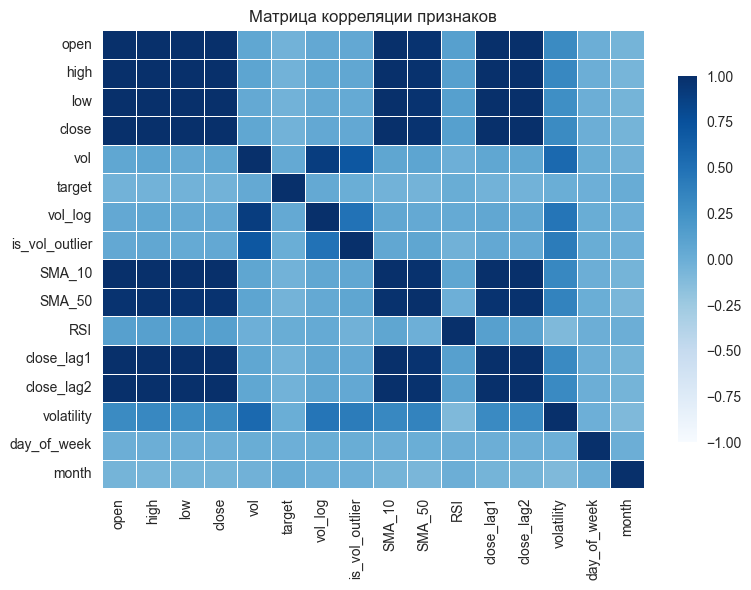

In [10]:
predictors = ['open', 'high', 'low', 'close', 'vol', 'target', 'vol_log', 'is_vol_outlier', 'SMA_10', 'SMA_50', 'RSI', 'close_lag1', 
              'close_lag2', 'volatility', 'day_of_week', 'month']
plot_correlation(df, predictors, annot=False)

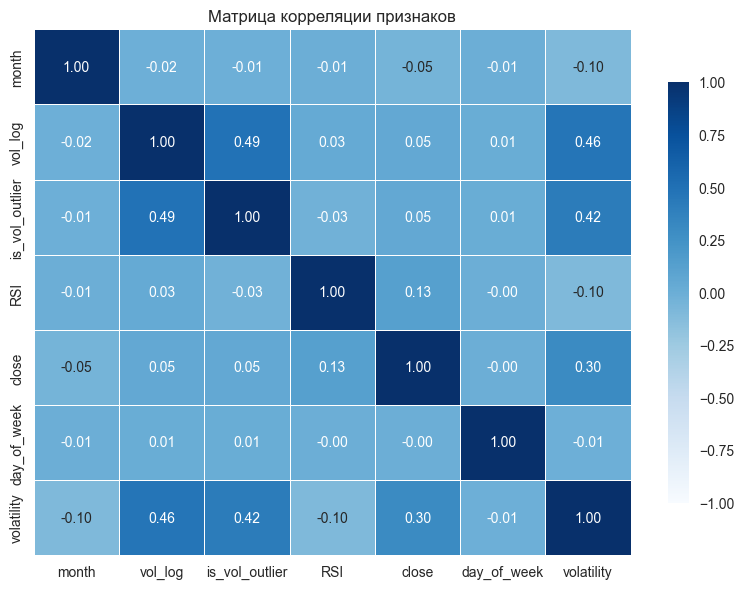

In [11]:
predictors = ['month', 'vol_log', 'is_vol_outlier', 'RSI', 'close', 'day_of_week', 'volatility']
plot_correlation(df, predictors, annot=True)

### 8. Обучение моделей

In [12]:
X = df[predictors]
y = df['target']
results, X_test, y_test = train_models(X, y)

[LightGBM] [Info] Number of positive: 988, number of negative: 978
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000187 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1041
[LightGBM] [Info] Number of data points in the train set: 1966, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502543 -> initscore=0.010173
[LightGBM] [Info] Start training from score 0.010173


### Вывод результатов

In [13]:
for name, result in results.items():
    print(f"=== {name} ===")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(result["report"])
    print("\n")

=== Random Forest ===
Accuracy: 0.4736
              precision    recall  f1-score   support

           0       0.41      0.47      0.44       217
           1       0.53      0.48      0.50       275

    accuracy                           0.47       492
   macro avg       0.47      0.47      0.47       492
weighted avg       0.48      0.47      0.48       492



=== XGBoost ===
Accuracy: 0.4614
              precision    recall  f1-score   support

           0       0.40      0.45      0.42       217
           1       0.52      0.47      0.50       275

    accuracy                           0.46       492
   macro avg       0.46      0.46      0.46       492
weighted avg       0.47      0.46      0.46       492



=== LightGBM ===
Accuracy: 0.5203
              precision    recall  f1-score   support

           0       0.46      0.49      0.48       217
           1       0.58      0.54      0.56       275

    accuracy                           0.52       492
   macro avg      

# Выбор модели для задачи классификации

## В рамках тестового задания было проведено сравнение пяти алгоритмов машинного обучения:

| Модель | Accuracy | Precision (класс 1) | Recall (класс 1) | F1-score (класс 1) |
|--------|----------|-------------------|------------------|-------------------|
| **LightGBM** | **0.5203** | **0.58** | **0.54** | **0.56** |
| Logistic Regression | 0.4959 | 0.55 | 0.52 | 0.54 |
| SVM | 0.4919 | 0.56 | 0.42 | 0.48 |
| Random Forest | 0.4736 | 0.53 | 0.48 | 0.50 |
| XGBoost | 0.4614 | 0.52 | 0.47 | 0.50 |

## Выбор модели: LightGBM

<details>
<summary><strong>Обоснование выбора</strong></summary>

### Обоснование выбора

**LightGBM** демонстрирует наилучшие результаты по всем ключевым метрикам:

1. **Наивысшая точность**: 52.03% против 49.59% у ближайшего конкурента (Logistic Regression)
2. **Лучший баланс precision/recall для класса 1**: 
   - Precision для класса 1: 0.58 (лучший результат)
   - Recall для класса 1: 0.54 (лучший результат)  
   - F1-score для класса 1: 0.56 (лучший результат)
3. **Сбалансированность**: LightGBM показывает хорошие результаты для обоих классов (macro avg = 0.52)

### Сравнительный анализ

- **LightGBM vs Logistic Regression**: При схожих показателях recall (0.54 vs 0.52), LightGBM значительно превосходит по precision (0.58 vs 0.55) и общей точности
- **LightGBM vs SVM**: Несмотря на высокую precision у SVM (0.56), его низкий recall (0.42) делает его менее предпочтительным
- **LightGBM vs Random Forest и XGBoost**: Заметное превосходство LightGBM по всем метрикам

### Дополнительные преимущества LightGBM

- **Скорость обучения**: Быстрее традиционных градиентных бустингов
- **Эффективность памяти**: Оптимизированное использование ресурсов
- **Обработка категориальных признаков**: Встроенная поддержка без предобработки
- **Устойчивость к переобучению**: Регуляризация по умолчанию
- **Интерпретируемость**: Возможность анализа важности признаков

### Рекомендации по улучшению

Для дальнейшего повышения качества модели рекомендуется:

1. **Настройка гиперпараметров** через Optuna или Hyperopt для LightGBM
2. **Feature Engineering** - создание новых признаков и их селекция
3. **Анализ дисбаланса классов** - текущее соотношение 217:275 относительно сбалансировано
4. **Кросс-валидация** для более надежной оценки производительности  
5. **Ансамблирование** - комбинирование LightGBM с Logistic Regression для повышения стабильности

</details>

## Заключение

**LightGBM** выбран в качестве финальной модели благодаря:
- Наивысшей точности (52.03%)
- Лучшему балансу precision/recall для целевого класса
- Превосходству по F1-score
- Потенциал для дальнейшего улучшения через настройку гиперпараметров

Модель демонстрирует умеренные, но стабильные результаты, что важно для практического применения.

### Детальная оценка лучшей модели


Детальная оценка лучшей модели (LightGBM):


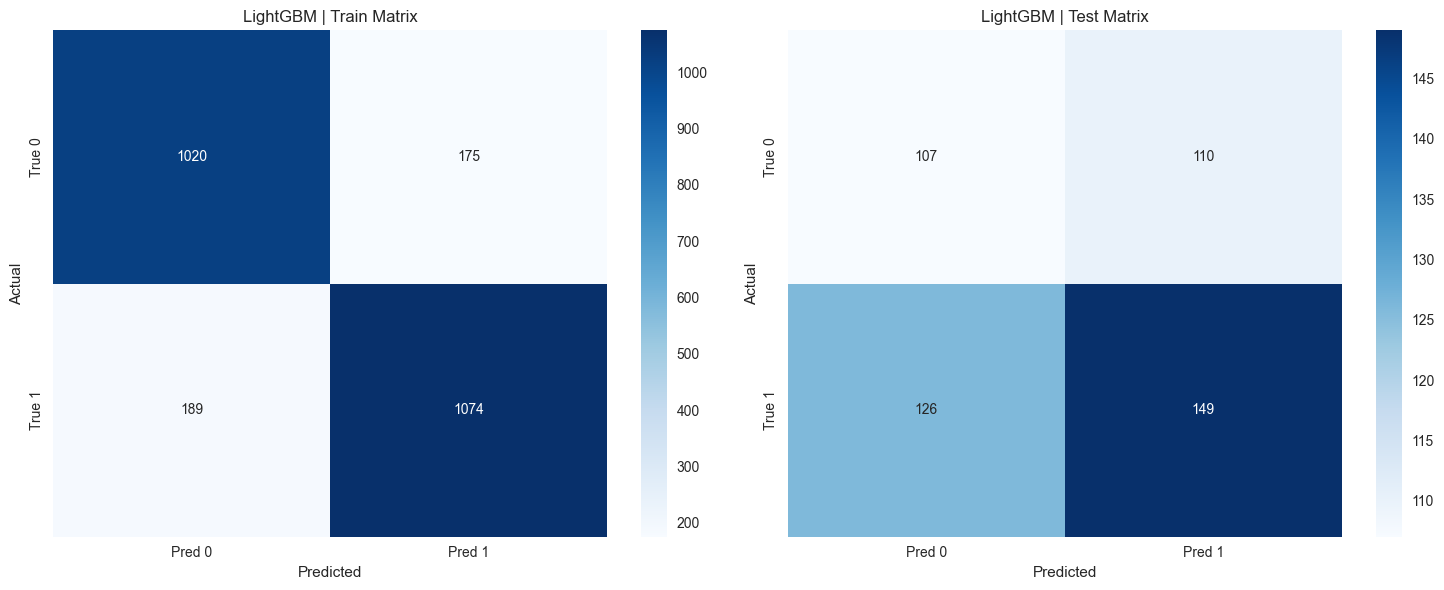


Отчёт производительности LightGBM

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.46      0.49      0.48       217
           1       0.58      0.54      0.56       275

    accuracy                           0.52       492
   macro avg       0.52      0.52      0.52       492
weighted avg       0.52      0.52      0.52       492

Метрики тренировка: {'Accuracy': 0.5319121236777868, 'Precision': 0.5298879103282626, 'Recall': 0.550356294536817, 'F1': 0.5750955414012739}
Метрики тест:{'Accuracy': 0.5203252032520326, 'Precision': 0.5752895752895753, 'Recall': 0.5418181818181819, 'F1': 0.5580524344569288}


In [14]:
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
best_model = results[best_model_name]['model']
print(f"\nДетальная оценка лучшей модели ({best_model_name}):")
evaluate_model(best_model, X, y, X_test, y_test, best_model_name)

## Метрики качества модели классификации
- Precision (Точность)
```Доля правильно предсказанных положительных случаев среди всех предсказанных как положительные.```
- Recall (Полнота/Чувствительность)
```Доля правильно найденных положительных случаев среди всех реальных положительных случаев.```
- F1-Score
```Гармоническое среднее между precision и recall.```
- Support (Поддержка)
```Количество реальных образцов каждого класса в тестовой выборке.```
- Accuracy (Общая точность)
```Доля правильных предсказаний среди всех предсказаний.```
